## Отчёт по иследовательской работе по программированию (12.02.2020)

Выполнили Ковригин Александр и Панюхин Никита

# New Section

Импортируем библиотеки и небольшая настройка

In [0]:
import os
import re
from typing import List, Tuple
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import display
from IPython.display import set_matplotlib_formats
from dataclasses import dataclass, field

%matplotlib inline
set_matplotlib_formats('svg')

Функция поиска фразы в тексте

In [0]:
def find(phrase: str, text: str) -> int:
    pattern = r"(\s|^)" + phrase + r"([\;\,\.\s]|$)"
    return len(re.findall(pattern, text))

Считываем файл с фразами

In [0]:
with open("sholohov/_phrases.txt", "r", encoding='utf-8') as file:
    phrases = list(filter(lambda x: x, list(map(lambda x: x.strip().lower(), file.readlines()))))
phrases_count = len(phrases)

In [0]:
@dataclass
class AnalysisResult:
    total_values: np.array
    target_values: np.array
    filename: str = ''
    delta: np.array = field(init=False)
    
    def __post_init__(self):
        self.delta = [abs(self.target_values[i] - self.total_values[i]) for i in range(phrases_count)]
    
    def visualize_as_table(self):
        nums = list(range(phrases_count))
        indexes = [y for x, y in sorted(zip(self.delta, nums), reverse=True)]
        
        data = np.array(np.array([(phrases[i],
                                   self.total_values[i],
                                   self.target_values[i],
                                   self.delta[i]) for i in indexes]))
        df = pd.DataFrame(data=data,
                          columns=['Word',
                                   'Average frequency of word occurrence (occurrences/' + str(NORM) + ' words)',
                                   'Target average frequency of word occurrence (occurrences/' + str(NORM) + ' words)',
                                   'Delta (occurrences/' + str(NORM) + ' words)'])
        df.name = 'Word occurrences difference in ' + self.filename
        display(df)
        return self
    
    def visualize_as_plot(self):
        def f(o):
            return [y for x, y in sorted(zip(self.delta, o))]
        sorted_total_values = f(self.total_values)
        sorted_target_values = f(self.target_values)
        sorted_phrases = f(phrases)
        
        sorted_delta = sorted(self.delta)
            
        plt.rc('font', size=FONT_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=8)     # fontsize of the x and y labels
        plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=FONT_SIZE)   # fontsize of the figure title
        
        plt.xticks(rotation=-90)
        
        plt.scatter(sorted_phrases, sorted_total_values, c=COLOR_SCHEME[0], s=DOT_SIZE).set_label('All works')
        plt.scatter(sorted_phrases, sorted_target_values, c=COLOR_SCHEME[1], s=DOT_SIZE).set_label('Target work')
        plt.scatter(sorted_phrases, sorted_delta, c=COLOR_SCHEME[2], s=DOT_SIZE).set_label('Delta')
        plt.legend(loc="center left")
        plt.show()
        return self

Константы

In [0]:
NORM = 100000
DATA_DIRECTORY = "./sholohov/"
FONT_SIZE = 6
DOT_SIZE = 10
COLOR_SCHEME = [
    "#0000ff",
    "#ff0000",
    "#00ff00"
]

In [0]:
def analyze(target_file: str, exclude: List[str] = None) -> AnalysisResult:
    if exclude is None:
	    exclude = []
    total_text_length = 0
    target_text_length = 0
    total_values = np.full(phrases_count, 0, float)
    target_values = np.full(phrases_count, 0, float)
    
    for filename in os.listdir(DATA_DIRECTORY):
        if filename == "_phrases.txt":
            continue
    
        with open(os.path.join(DATA_DIRECTORY, filename), "r", encoding='utf-8') as file:
            text = file.read().strip().lower()
    
        if filename in exclude:
            print(filename, 'skipped')
            continue
        elif filename == target_file:
            target_text_length += len(text.split())
            for i in range(phrases_count):
                if text.count(phrases[i]) != 0:
                    total_values[i] += find(phrases[i], text)
        else:
            total_text_length += len(text.split())
            for i in range(phrases_count):
                if text.count(phrases[i]) != 0:
                    target_values[i] += find(phrases[i], text)
        print(filename, 'processed')
    
    
    for i in range(phrases_count):
        total_values[i] *= len(phrases[i]) * NORM / total_text_length
        target_values[i] *= len(phrases[i]) * NORM / target_text_length
    
    return AnalysisResult(total_values, target_values, target_file)


obida.txt processed
semya.txt processed
batraki.txt processed
dorozhenka.txt processed
kolchak.txt processed
don.txt processed
pastuh.txt processed
slovo.txt processed
tselina.txt processed
chervotochina.txt processed
zherebenok.txt processed
rodina.txt processed
step.txt processed
predsedatel.txt processed
nahalenok.txt processed
krov.txt processed
serdtse.txt processed
semejnyj.txt processed
donprodkom.txt processed
dvuhmuzhnyaya.txt processed
stezhka.txt processed
vrag.txt processed
kaloshi.txt processed
rodinka.txt processed
prodkomissar.txt processed
kolovert.txt processed
myagkotelyj.txt processed
yazik.txt processed
ilyuha.txt processed
bahchevnik.txt processed


,Word,Average frequency of word occurrence (occurrences/100000 words),Target average frequency of word occurrence (occurrences/100000 words),Delta (occurrences/100000 words)
0,должно,178.7021120887724,73.17172319408122,105.53038889469117
1,видно,258.12527301711566,154.69947650600506,103.4257965111106
2,небось,166.7886379495209,109.75758479112183,57.031053158399075
3,должно быть,81.12508580537921,34.77915238237194,46.345933423007274
4,по всей вероятности,37.72600144096307,0.0,37.72600144096307
5,видимо,52.75967118811376,21.680510576024066,31.07916061208969
6,очевидно,31.769264371337314,52.39456722539149,20.625302854054176
7,вероятно,34.03849754071855,14.453673717349377,19.584823823369177
8,чай,17.019248770359276,0.0,17.019248770359276
9,может быть,85.09624385179637,101.6273933251128,16.531149473316432


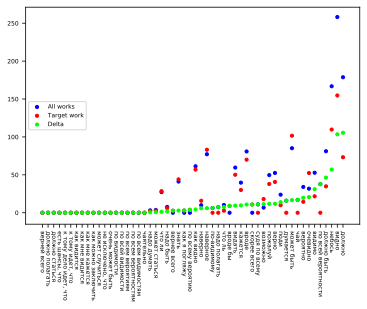

In [17]:
r = analyze("don.txt").visualize_as_table().visualize_as_plot()

obida.txt processed
semya.txt processed
batraki.txt processed
dorozhenka.txt processed
kolchak.txt processed
don.txt skipped
pastuh.txt processed
slovo.txt processed
tselina.txt processed
chervotochina.txt processed
zherebenok.txt processed
rodina.txt processed
step.txt processed
predsedatel.txt processed
nahalenok.txt processed
krov.txt processed
serdtse.txt processed
semejnyj.txt processed
donprodkom.txt processed
dvuhmuzhnyaya.txt processed
stezhka.txt processed
vrag.txt processed
kaloshi.txt processed
rodinka.txt processed
prodkomissar.txt processed
kolovert.txt processed
myagkotelyj.txt processed
yazik.txt processed
ilyuha.txt processed
bahchevnik.txt processed


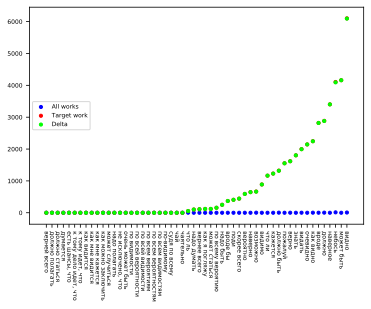

,Word,Average frequency of word occurrence (occurrences/100000 words),Target average frequency of word occurrence (occurrences/100000 words),Delta (occurrences/100000 words)
0,видно,7.315845536163687,6100.942872989462,6093.627027453298
1,может быть,0.0,4159.733777038269,4159.733777038269
2,небось,12.290620500754995,4104.270660011092,4091.9800395103375
3,наверное,0.0,3401.7378443335183,3401.7378443335183
4,должно,3.5116058573585702,2884.0820854132003,2880.5704795558418
5,вроде,1.4631691072327375,2819.3751155481605,2817.9119464409277
6,как видно,2.6337043930189274,2246.2562396006656,2243.6225352076467
7,очевидно,0.0,2144.5738583841744,2144.5738583841744
8,видать,1.7558029286792851,1996.6722129783693,1994.91641004969
9,знать,0.0,1802.5513033832501,1802.5513033832501


In [16]:
r = analyze("batraki.txt", exclude=["don.txt"]).visualize_as_plot().visualize_as_table()

Посмотрев на график и на таблицу результатов, увидим, что слова и фразы "должно", "видно", "может быть" довольно сильно выделяются.